Compare the new method to the previous one in terms of running time and result.
Each cell after the first one tests for one metric. 

Output displays running time in tqdm progress bar, where the first one (new) should be significantly shorter than the second (previous). 

The two plots show interbrain connectivity (32x32) for one frequency band for two methods respectively -- this should be a sanity check for correct computation.

Note: the new method is computing intra- and inter- brain connectivity at once, while the old one is only for interbrain. I only plotted interbrain.

Note 2: I made some corrections to the "original" functions since last time as well!

In [1]:
import os
from copy import copy
from collections import OrderedDict
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import mne
import timeit

from HyPyP.hypyp import viz
from HyPyP.hypyp import analyses
from HyPyP.hypyp import prep

plt.ion()

# Frequency bands used in the study
freq_bands = {'Theta': [4, 7],
              'Alpha-Low': [7.5, 11],
              'Alpha-High': [11.5, 13],
              'Beta': [13.5, 29.5],
              'Gamma': [30, 48]}
freq_bands = OrderedDict(freq_bands)  # Force to keep order

path = 'E:/Dropbox\EPOCHS\Sackler_10.01.18\session1/'
# Loading data files & extracting sensor infos
epo1 = mne.read_epochs(os.path.join(path, "boscc_TALK_1_adult-epo.fif"), preload=True)
epo1 = epo1.drop_channels('STI 014')  # remove stim channel
loc1 = copy(np.array([ch['loc'][:3] for ch in epo1.info['chs']]))
lab1 = [ch + "_1" for ch in epo1.ch_names]

epo2 = mne.read_epochs(os.path.join(path, "boscc_TALK_1_kid-epo.fif"), preload=True)
epo2 = epo2.drop_channels('STI 014')  # remove stim channel
loc2 = copy(np.array([ch['loc'][:3] for ch in epo2.info['chs']]))
lab2 = [ch + "_2" for ch in epo2.ch_names]
loc2 = viz.transform(loc2)

# Equalize epochs size
mne.epochs.equalize_epoch_counts([epo1, epo2])

# Connectivity
# Create array
data = np.array([epo1.get_data(), epo2.get_data()])
complex_signal = analyses.compute_freq_bands(data, freq_bands)

c:\users\phoebe chen\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\phoebe chen\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
c:\users\phoebe chen\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


Reading E:/Dropbox\EPOCHS\Sackler_10.01.18\session1/boscc_TALK_1_adult-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
255 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Reading E:/Dropbox\EPOCHS\Sackler_10.01.18\session1/boscc_TALK_1_kid-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
255 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Dropped 0 epochs
Dropped 0 epochs


C:\Users\Phoebe Chen\PycharmProjects\syncpipeline\HyPyP\hypyp\analyses.py:528: RuntimeWarning: filter_length (827) is longer than the signal (501), distortion is likely. Reduce filter length or filter a longer signal.
  for subject in range(2)  # for each subject
C:\Users\Phoebe Chen\PycharmProjects\syncpipeline\HyPyP\hypyp\analyses.py:528: RuntimeWarning: filter_length (827) is longer than the signal (501), distortion is likely. Reduce filter length or filter a longer signal.
  for subject in range(2)  # for each subject
C:\Users\Phoebe Chen\PycharmProjects\syncpipeline\HyPyP\hypyp\analyses.py:528: RuntimeWarning: filter_length (827) is longer than the signal (501), distortion is likely. Reduce filter length or filter a longer signal.
  for subject in range(2)  # for each subject
C:\Users\Phoebe Chen\PycharmProjects\syncpipeline\HyPyP\hypyp\analyses.py:528: RuntimeWarning: filter_length (827) is longer than the signal (501), distortion is likely. Reduce filter length or filter a longe

(not time resolved) new method takes 16.3415612


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:14<00:00, 17.36it/s]


(time resolved) new method takes 16.2585258


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [01:29<00:00,  3.00it/s]


old method takes 90.6895014


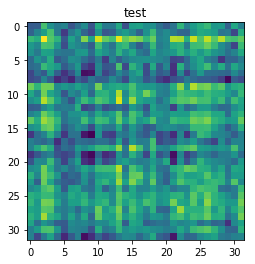

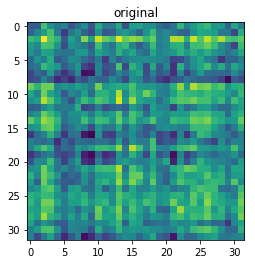

In [2]:
# PLV
mode = 'plv'

start_time = timeit.default_timer()
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=False)
elapsed = timeit.default_timer() - start_time
print('(not time resolved) new method takes '+str(elapsed))

start_time = timeit.default_timer()
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=True)
elapsed = timeit.default_timer() - start_time
print('(time resolved) new method takes '+str(elapsed))

start_time = timeit.default_timer()
original = analyses.compute_sync_new(complex_signal, mode, time_resolved=True)
elapsed = timeit.default_timer() - start_time
print('old method takes '+str(elapsed))

plt.figure()
plt.title('test')
plt.imshow(test[0,0:32,32:64])
plt.figure()
plt.title('original')
plt.imshow(original[:,:,0])

(not time resolved) new method takes 7.6472835000000146


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:02<00:00, 103.64it/s]


(time resolved) new method takes 7.598359799999997


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [01:35<00:00,  2.75it/s]


old method takes 97.2459173


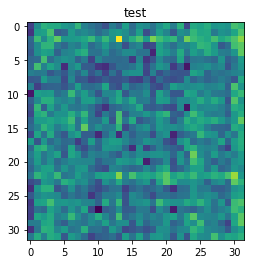

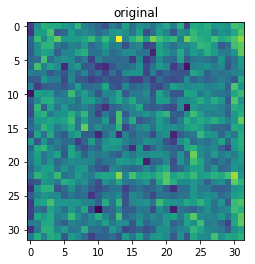

In [3]:
# CCORR
mode = 'ccorr'
start_time = timeit.default_timer()
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=False)
elapsed = timeit.default_timer() - start_time
print('(not time resolved) new method takes '+str(elapsed))

start_time = timeit.default_timer()
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=True)
elapsed = timeit.default_timer() - start_time
print('(time resolved) new method takes '+str(elapsed))

start_time = timeit.default_timer()
original = analyses.compute_sync_new(complex_signal, mode, time_resolved=True)
elapsed = timeit.default_timer() - start_time
print('old method takes '+str(elapsed))

plt.figure()
plt.title('test')
plt.imshow(test[0,0:32,32:64])
plt.figure()
plt.title('original')
plt.imshow(original[:,:,0])

(not time resolved) new method takes 18.708016000000043


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:17<00:00, 14.68it/s]


(time resolved) new method takes 18.708035499999994


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:44<00:00,  5.89it/s]


old method takes 44.5063614


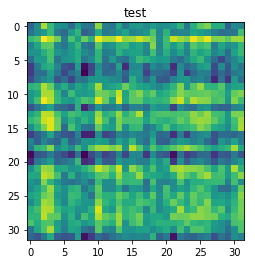

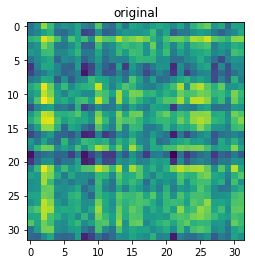

In [4]:
# Coherence
mode = 'coh'

start_time = timeit.default_timer()
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=False)
elapsed = timeit.default_timer() - start_time
print('(not time resolved) new method takes '+str(elapsed))

start_time = timeit.default_timer()
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=True)
elapsed = timeit.default_timer() - start_time
print('(time resolved) new method takes '+str(elapsed))

start_time = timeit.default_timer()
original = analyses.compute_sync_new(complex_signal, mode, time_resolved=True)
elapsed = timeit.default_timer() - start_time
print('old method takes '+str(elapsed))

plt.figure()
plt.title('test')
plt.imshow(test[0,0:32,32:64])
plt.figure()
plt.title('original')
plt.imshow(original[:,:,0])

(not time resolved) new method takes 17.951526699999995


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:16<00:00, 15.02it/s]


(time resolved) new method takes 18.208461200000002


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:46<00:00,  5.77it/s]


old method takes 46.1577279


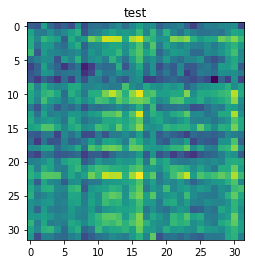

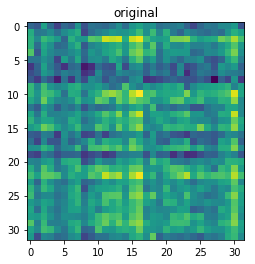

In [2]:
# Imaginary Coherence
mode = 'imagcoh'

start_time = timeit.default_timer()
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=False)
elapsed = timeit.default_timer() - start_time
print('(not time resolved) new method takes '+str(elapsed))

start_time = timeit.default_timer()
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=True)
elapsed = timeit.default_timer() - start_time
print('(time resolved) new method takes '+str(elapsed))

start_time = timeit.default_timer()
original = analyses.compute_sync_new(complex_signal, mode, time_resolved=True)
elapsed = timeit.default_timer() - start_time
print('old method takes '+str(elapsed))

plt.figure()
plt.title('test')
plt.imshow(test[0,0:32,32:64])
plt.figure()
plt.title('original')
plt.imshow(original[:,:,0])

(not time resolved) new method takes 3.849835100000007


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:02<00:00, 102.68it/s]


(time resolved) new method takes 3.7158870000000093


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:17<00:00, 14.40it/s]


old method takes 18.2279556


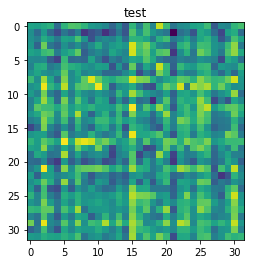

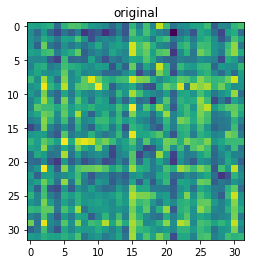

In [3]:
# envelope
mode = 'envelope'

start_time = timeit.default_timer()
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=False)
elapsed = timeit.default_timer() - start_time
print('(not time resolved) new method takes '+str(elapsed))

start_time = timeit.default_timer()
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=True)
elapsed = timeit.default_timer() - start_time
print('(time resolved) new method takes '+str(elapsed))

start_time = timeit.default_timer()
original = analyses.compute_sync_new(complex_signal, mode, time_resolved=True)
elapsed = timeit.default_timer() - start_time
print('old method takes '+str(elapsed))

plt.figure()
plt.title('test')
plt.imshow(test[0,0:32,32:64])
plt.figure()
plt.title('original')
plt.imshow(original[:,:,0])

(not time resolved) new method takes 32.39542309999999


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:30<00:00,  8.63it/s]


(time resolved) new method takes 32.442846


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [01:00<00:00,  3.96it/s]


old method takes 60.20035809999999


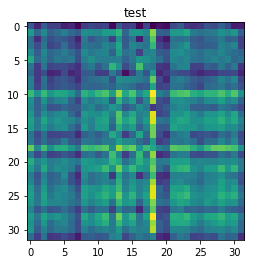

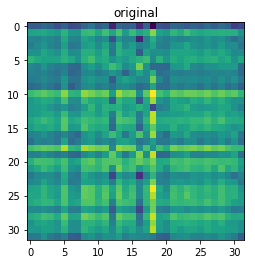

In [4]:
# Projected Power Corr
mode = 'proj'
start_time = timeit.default_timer()
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=False)
elapsed = timeit.default_timer() - start_time
print('(not time resolved) new method takes '+str(elapsed))

start_time = timeit.default_timer()
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=True)
elapsed = timeit.default_timer() - start_time
print('(time resolved) new method takes '+str(elapsed))

start_time = timeit.default_timer()
original = analyses.compute_sync_new(complex_signal, mode, time_resolved=True)
elapsed = timeit.default_timer() - start_time
print('old method takes '+str(elapsed))

plt.figure()
plt.title('test')
plt.imshow(test[0,0:32,32:64])
plt.figure()
plt.title('original')
plt.imshow(original[:,:,0])